In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import gamma, multivariate_normal
import data

In [2]:
mu = [np.array([[0.0], [0.0], [0.0], [0.0], [0.0]])]
gauss_lambda = [np.identity(5)*0.0000001]
a = [1]
b = [100]

def phi_function(x, mu):
    return sum([mu[n]*(x**n) for n in range(5)])


def phi(x):
    return np.array([x**n for n in range(5)]).reshape(-1,1)
        

def gen_lambda_dist():
    i = len(mu)-1
    print("a: {}\nb: {}".format(a[i], b[i]))
    return gamma(a[i], scale=1/b[i])

def gen_w_dist(lmd):
    i = len(mu)-1
    print("lambda: {}\nmu: {}\nLambda: {}\nlambdaLambda: {}".format(lmd, mu[i], gauss_lambda[i], lmd*gauss_lambda[i]))
    return multivariate_normal(mu[i].flatten(), np.linalg.inv(gauss_lambda[i])/lmd)

def draw(pdf, range_min, range_max, step):
    xs = np.arange(range_min, range_max, step)
#    xs = [10**(e*0.1) for e in range(-100,20)]
    ys = [pdf.pdf(x) for x in xs]
    plt.plot(xs, ys)
    plt.show()

a: 1
b: 100


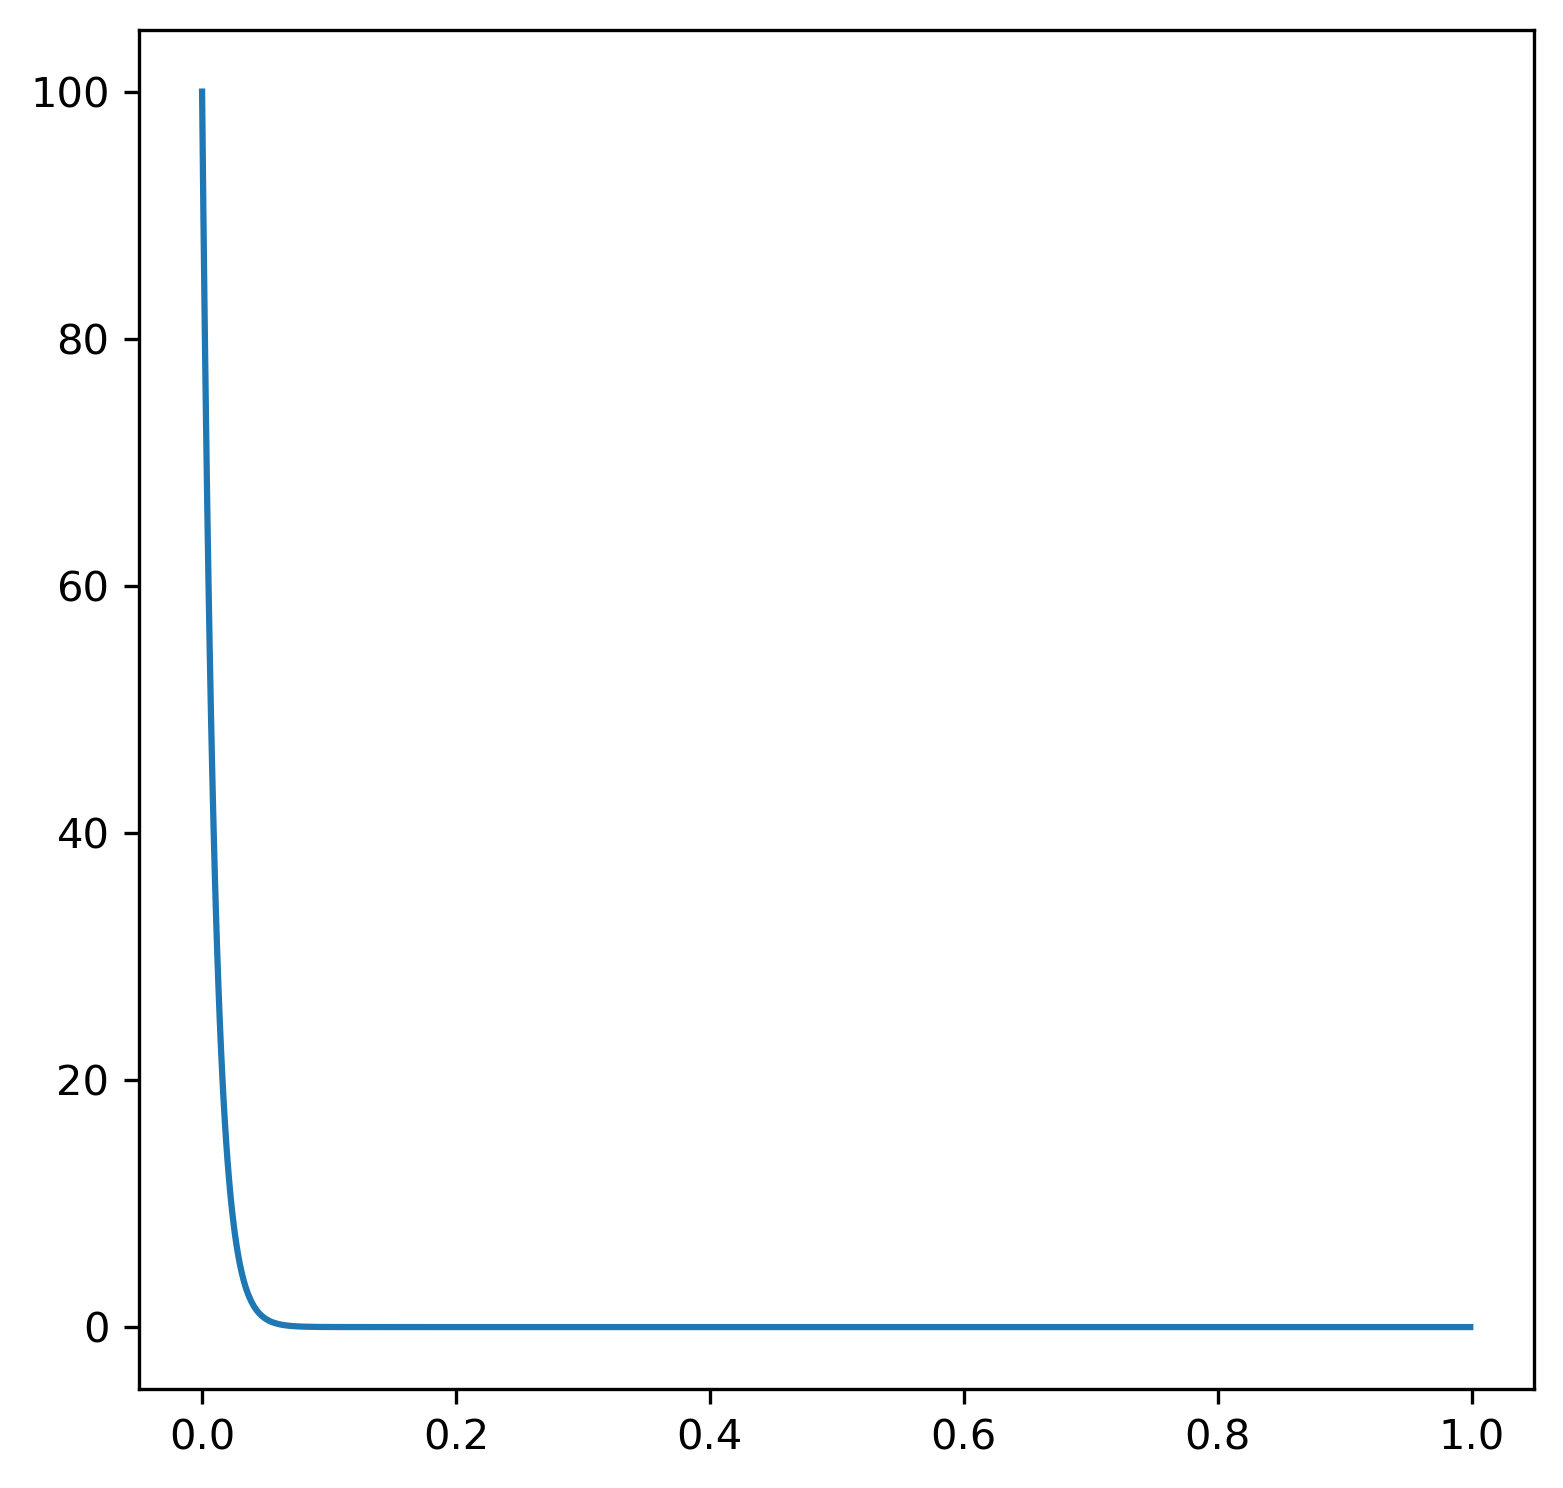

In [3]:
lambda_dist = gen_lambda_dist()
plt.figure(figsize=(6, 6), dpi=300)
#plt.xscale("log")
draw(lambda_dist, 0, 1, 0.001)

In [4]:
lambda_dist.rvs(10)

array([0.00962188, 0.02606573, 0.00393418, 0.00372197, 0.00809118,
       0.00547013, 0.00054831, 0.01653566, 0.01313566, 0.00549647])

In [5]:
lmd = lambda_dist.rvs(1)
print(lmd)
w_dist = gen_w_dist(lmd)

[0.00824487]
lambda: [0.00824487]
mu: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Lambda: [[1.e-07 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-07 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-07 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-07 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-07]]
lambdaLambda: [[8.24486702e-10 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 8.24486702e-10 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 8.24486702e-10 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 8.24486702e-10
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  8.24486702e-10]]


In [6]:
w_dist.rvs(10)

array([[  1362.3243782 ,  10541.39007373,  25920.36886118,
        -77231.16977606,   8952.17274718],
       [ 50830.54049342, -32488.36158236,  -1097.99289992,
         -3032.93512179,  39789.8948383 ],
       [  7741.35469377, -41618.99456719, -19892.86928719,
         63838.52811303, -28422.78071753],
       [  3275.74783495, -56000.02241972, -57027.2497218 ,
        -24766.39231756, -71030.18565185],
       [ 23140.60672353,  40931.66801383,  23265.76892693,
         67247.6929462 ,  30896.90220934],
       [   871.9314683 ,  30692.99144218, -23446.59795066,
          2315.58812682,  18309.3181529 ],
       [-44931.33392866,   3184.46577479,  -1787.1441735 ,
         41459.58812953,  20164.83300356],
       [-12541.87592075,  21185.80517263, -17142.89408772,
        -35443.38699697, -30137.35456011],
       [-37373.8188041 ,  -3824.32615269,  38376.27544973,
         28071.87911208,  -2967.18263054],
       [ 38198.75011465, -43619.599125  , -34156.14021333,
         16926.96940798

In [7]:
w_dist.cov

array([[1.21287584e+09, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 1.21287584e+09, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.21287584e+09, 0.00000000e+00,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.21287584e+09,
        0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        1.21287584e+09]])

In [8]:
#data = []
#for i in range(1000):
#    x = (np.random.rand() - 0.5)*10
#    y = x**2 + np.random.randn() + 0.4
    
#    data.append([x,y])

data = data.x_00121_5_normal

In [9]:
def draw_data(data):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    plt.show()

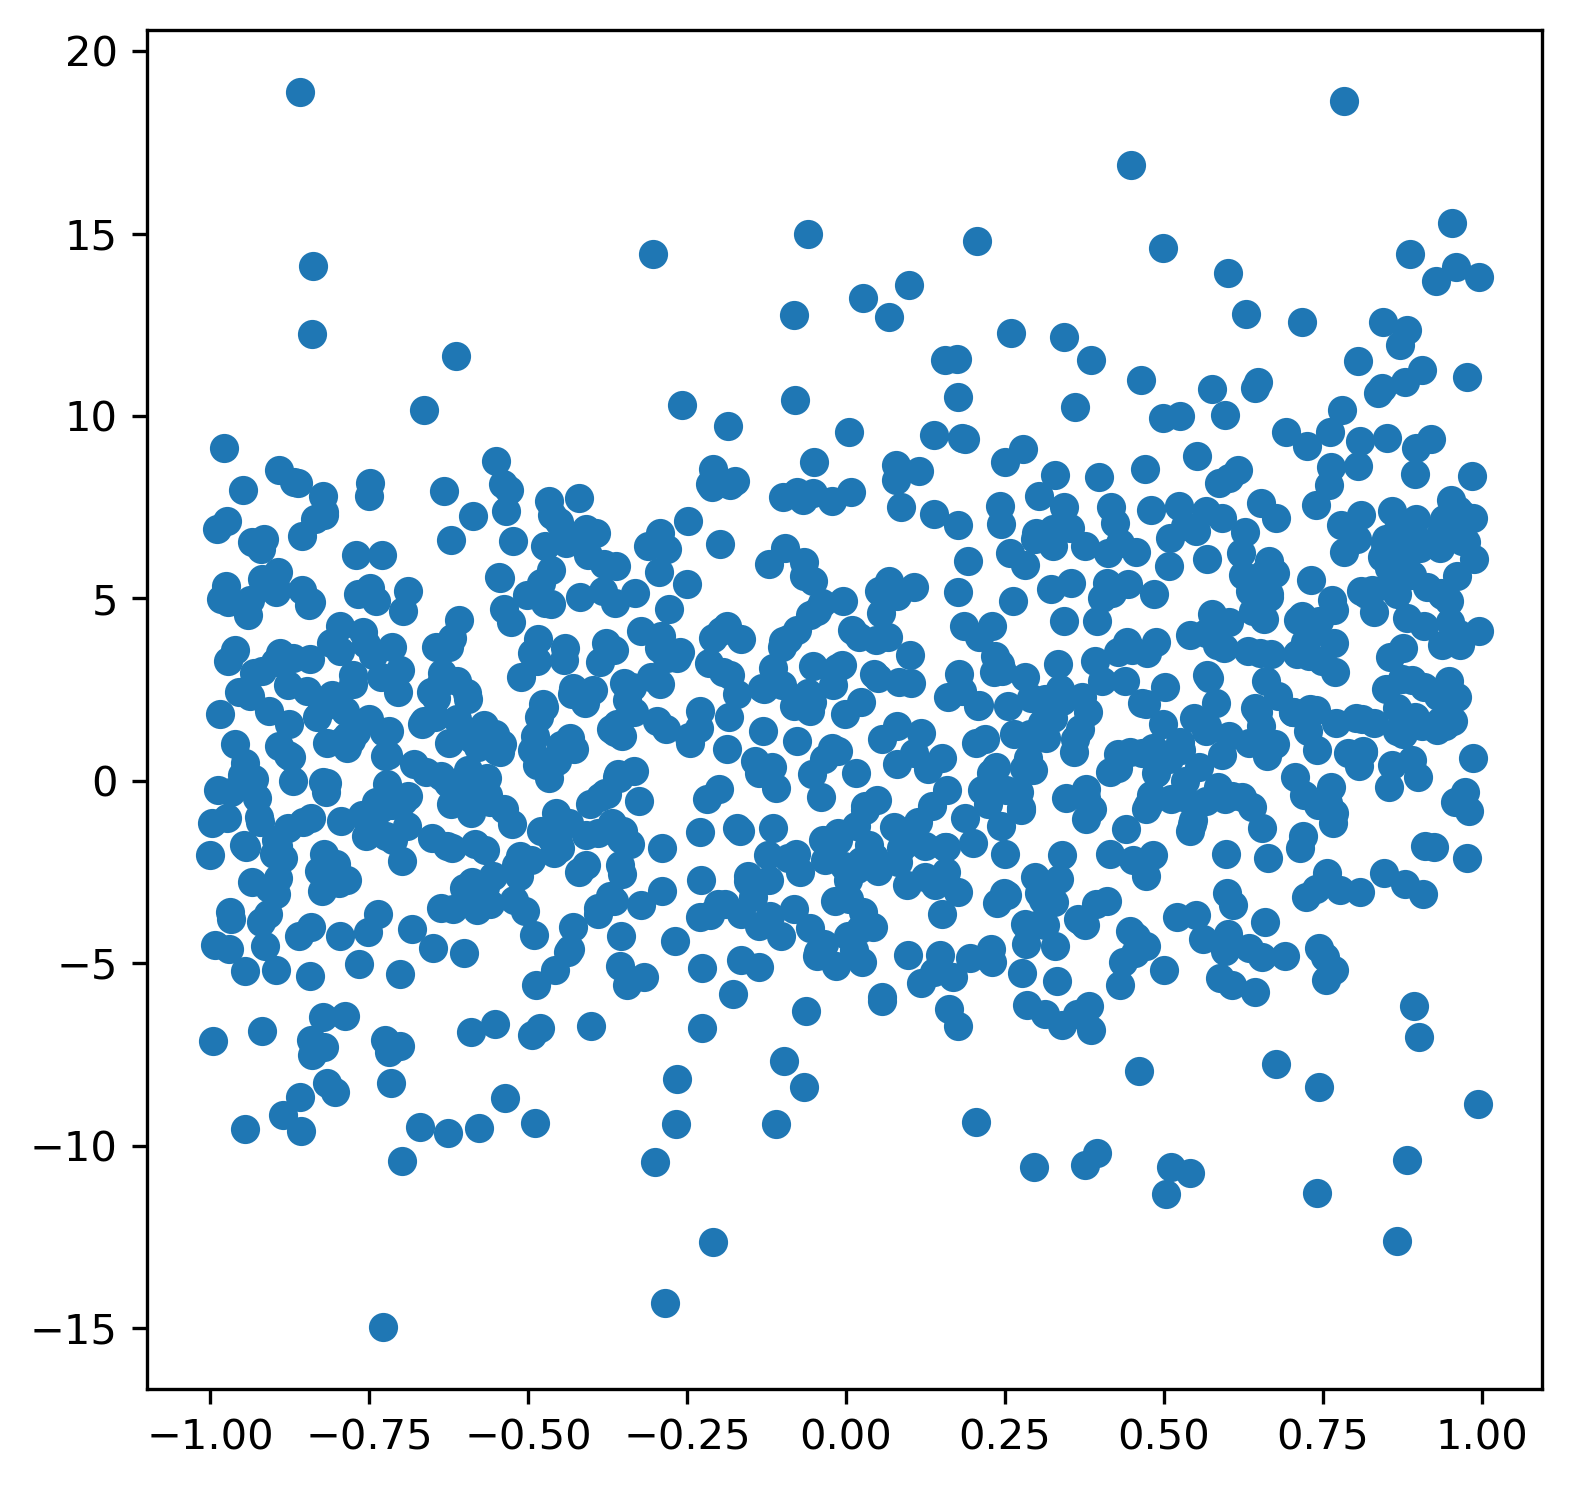

In [10]:
plt.figure(figsize=(6, 6), dpi=300)
draw_data(data)

a: 1
b: 100
lambda: 0.0007210079160901655
mu: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Lambda: [[1.e-07 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-07 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-07 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-07 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-07]]
lambdaLambda: [[7.21007916e-11 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 7.21007916e-11 0.00000000e+00 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 7.21007916e-11 0.00000000e+00
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 7.21007916e-11
  0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  7.21007916e-11]]
lambda: 0.0015890791211699315
mu: [[0.]
 [0.]
 [0.]
 [0.]
 [0.]]
Lambda: [[1.e-07 0.e+00 0.e+00 0.e+00 0.e+00]
 [0.e+00 1.e-07 0.e+00 0.e+00 0.e+00]
 [0.e+00 0.e+00 1.e-07 0.e+00 0.e+00]
 [0.e+00 0.e+00 0.e+00 1.e-07 0.e+00]
 [0.e+00 0.e+00 0.e+00 0.e+00 1.e-07]]
lambdaLambda: [[1.58907912e-10 0.00000000e+00

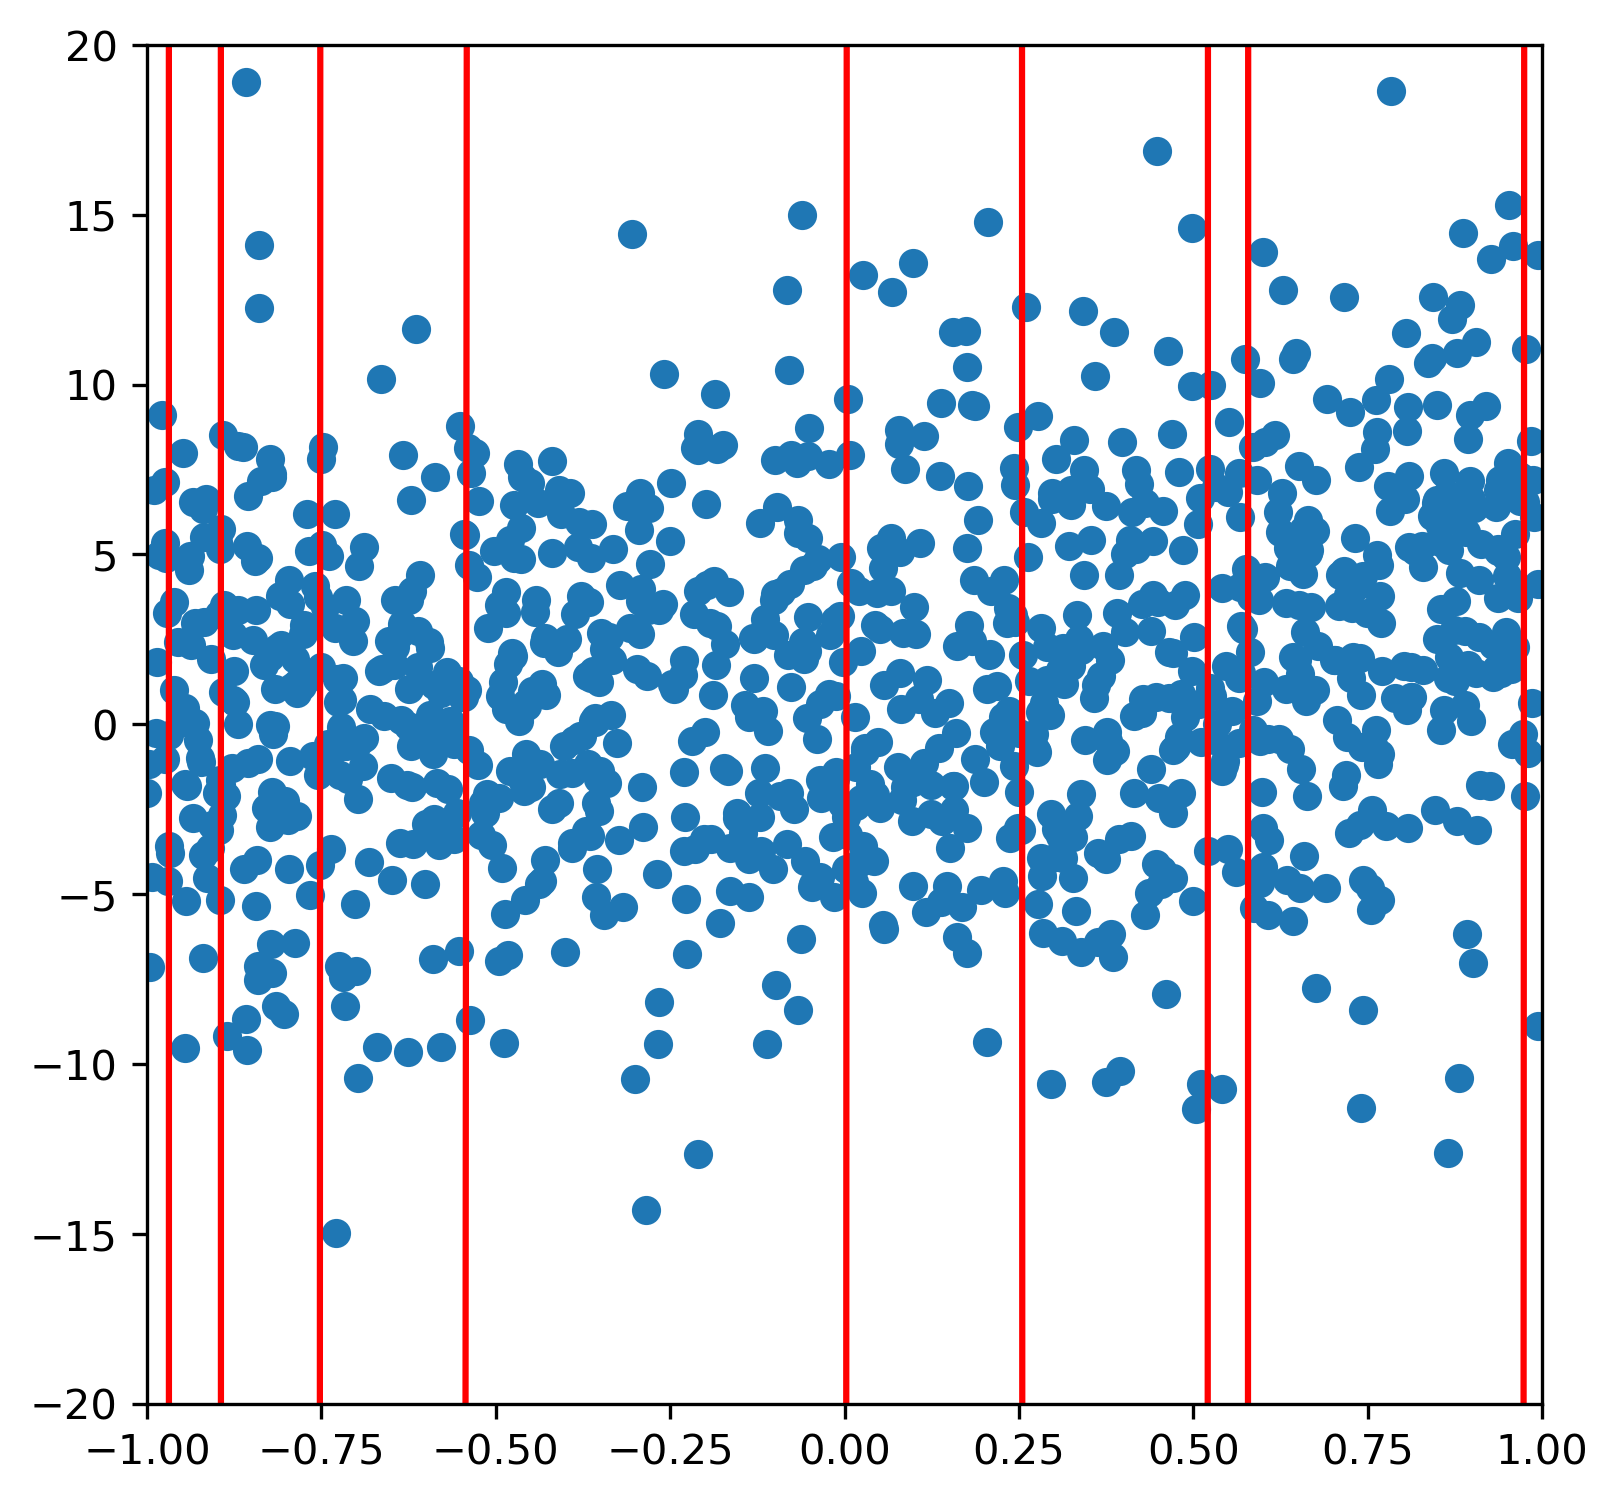

In [11]:
def draw_estimate(data, mus):
    xs = [e[0] for e in data]
    ys = [e[1] for e in data]
    plt.scatter(xs, ys)
    
    xs = np.arange(-5, 5, 0.01)
    
    for mu in mus:
        ys = [phi_function(x, mu) for x in xs]
        plt.plot(xs, ys, color="red")
    
def draw_estimates(num, data):
    plt.figure(figsize=(6, 6), dpi=300)
    mus = []

    lmd_dist = gen_lambda_dist()
    lmds = lmd_dist.rvs(num)

    for lmd in lmds: 
        w_dist = gen_w_dist(lmd)
        mus.append(w_dist.rvs(1))
    
    draw_estimate(data, mus)
    
    plt.xlim(-1,1)
    plt.ylim(-20,20)
    plt.show()
   
draw_estimates(10, data)

In [12]:
def update(data):
    i = len(mu)
    ph_vecs = [phi(x[0]) for x in data]
    ph_sum = sum([np.dot(p, p.T) for p in ph_vecs])
 #   plt.figure(figsize=(10, 10), dpi=300)
    gauss_lambda.append(gauss_lambda[0] + ph_sum)
    y_ph = [data[j][1]*ph_vecs[j] for j in range(len(ph_vecs))]    
    mu.append(
        np.dot(
            np.linalg.inv(gauss_lambda[i]),
            sum(y_ph) + np.dot(gauss_lambda[0], mu[0])
        )
    )
    
    a.append(a[0] + len(data)/2)
    b.append(b[0] + 0.5*(
        np.squeeze(
            np.dot( np.dot(mu[0].T, gauss_lambda[0]) , mu[0] ) 
            - np.dot( np.dot(mu[i].T, gauss_lambda[i]) , mu[i] )
            + sum([d[1]*d[1] for d in data])
        )
    ))
    

a: 3.5
b: 100.00110610162139
lambda: 0.03111384221977392
mu: [[ 11.27490677]
 [ 60.73776643]
 [-74.99304027]
 [-92.8269109 ]
 [ 63.74898599]]
Lambda: [[ 5.0000001   0.04493447  1.54772292 -0.25047538  0.85893251]
 [ 0.04493447  1.54772302 -0.25047538  0.85893251 -0.36049574]
 [ 1.54772292 -0.25047538  0.85893261 -0.36049574  0.55300476]
 [-0.25047538  0.85893251 -0.36049574  0.55300486 -0.34109767]
 [ 0.85893251 -0.36049574  0.55300476 -0.34109767  0.38678246]]
lambdaLambda: [[ 0.15556921  0.00139808  0.04815561 -0.00779325  0.02672469]
 [ 0.00139808  0.04815561 -0.00779325  0.02672469 -0.01121641]
 [ 0.04815561 -0.00779325  0.02672469 -0.01121641  0.0172061 ]
 [-0.00779325  0.02672469 -0.01121641  0.01720611 -0.01061286]
 [ 0.02672469 -0.01121641  0.0172061  -0.01061286  0.01203429]]
lambda: 0.029361897986210323
mu: [[ 11.27490677]
 [ 60.73776643]
 [-74.99304027]
 [-92.8269109 ]
 [ 63.74898599]]
Lambda: [[ 5.0000001   0.04493447  1.54772292 -0.25047538  0.85893251]
 [ 0.04493447  1.54

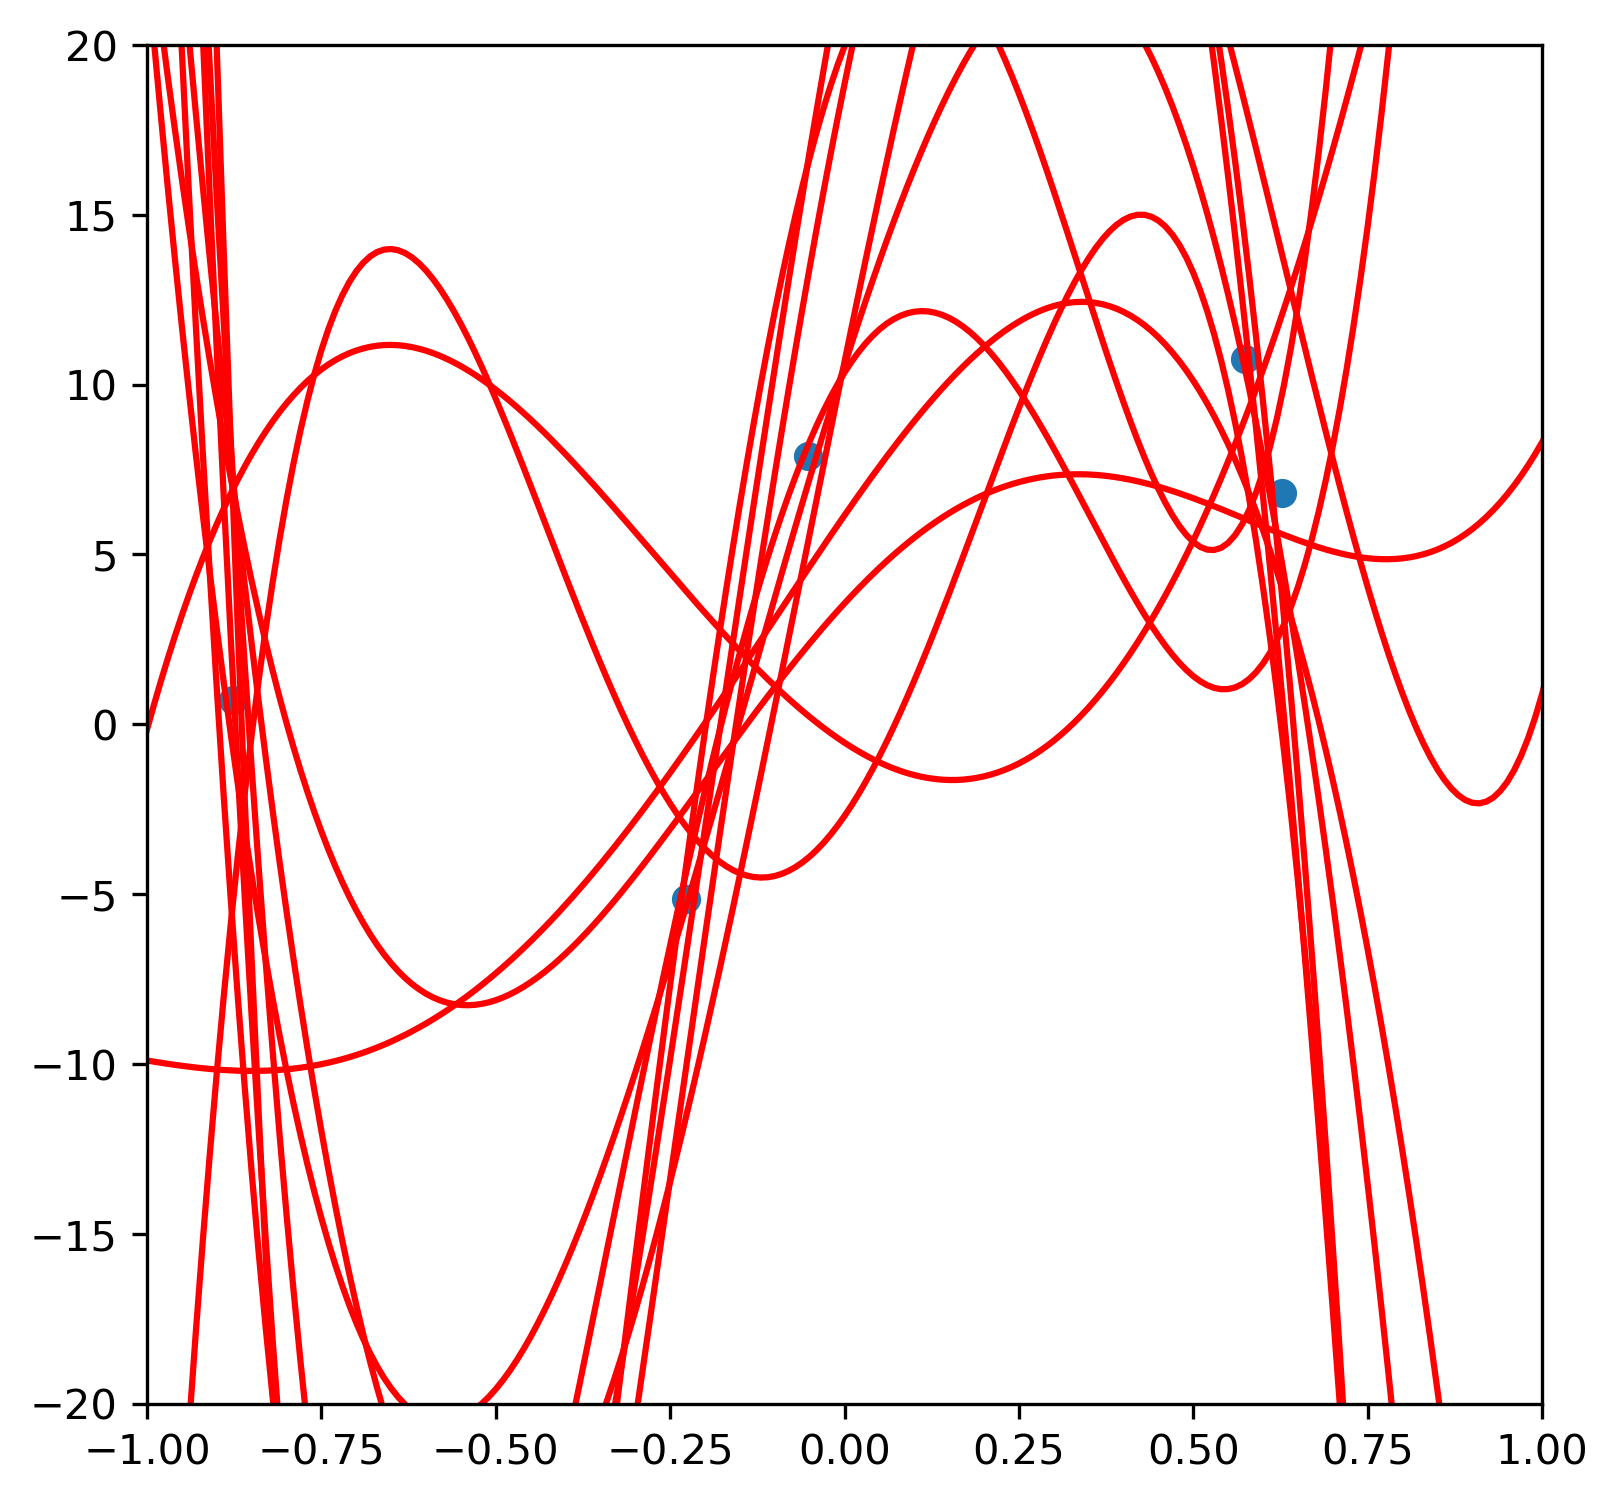

In [13]:
update(data[:5])
draw_estimates(10, data[:5])

a: 6.0
b: 164.87266288186171
lambda: 0.012227568055115608
mu: [[  0.10754207]
 [  8.63871834]
 [ 48.35229779]
 [-21.3811426 ]
 [-73.09420086]]
Lambda: [[10.0000001  -2.1531697   3.50518286 -1.90532732  2.36678046]
 [-2.1531697   3.50518296 -1.90532732  2.36678046 -1.74087776]
 [ 3.50518286 -1.90532732  2.36678056 -1.74087776  1.82742098]
 [-1.90532732  2.36678046 -1.74087776  1.82742108 -1.52020025]
 [ 2.36678046 -1.74087776  1.82742098 -1.52020025  1.47916597]]
lambdaLambda: [[ 0.12227568 -0.02632803  0.04285986 -0.02329752  0.02893997]
 [-0.02632803  0.04285986 -0.02329752  0.02893997 -0.0212867 ]
 [ 0.04285986 -0.02329752  0.02893997 -0.0212867   0.02234491]
 [-0.02329752  0.02893997 -0.0212867   0.02234492 -0.01858835]
 [ 0.02893997 -0.0212867   0.02234491 -0.01858835  0.0180866 ]]
lambda: 0.015944851195985786
mu: [[  0.10754207]
 [  8.63871834]
 [ 48.35229779]
 [-21.3811426 ]
 [-73.09420086]]
Lambda: [[10.0000001  -2.1531697   3.50518286 -1.90532732  2.36678046]
 [-2.1531697   3.5

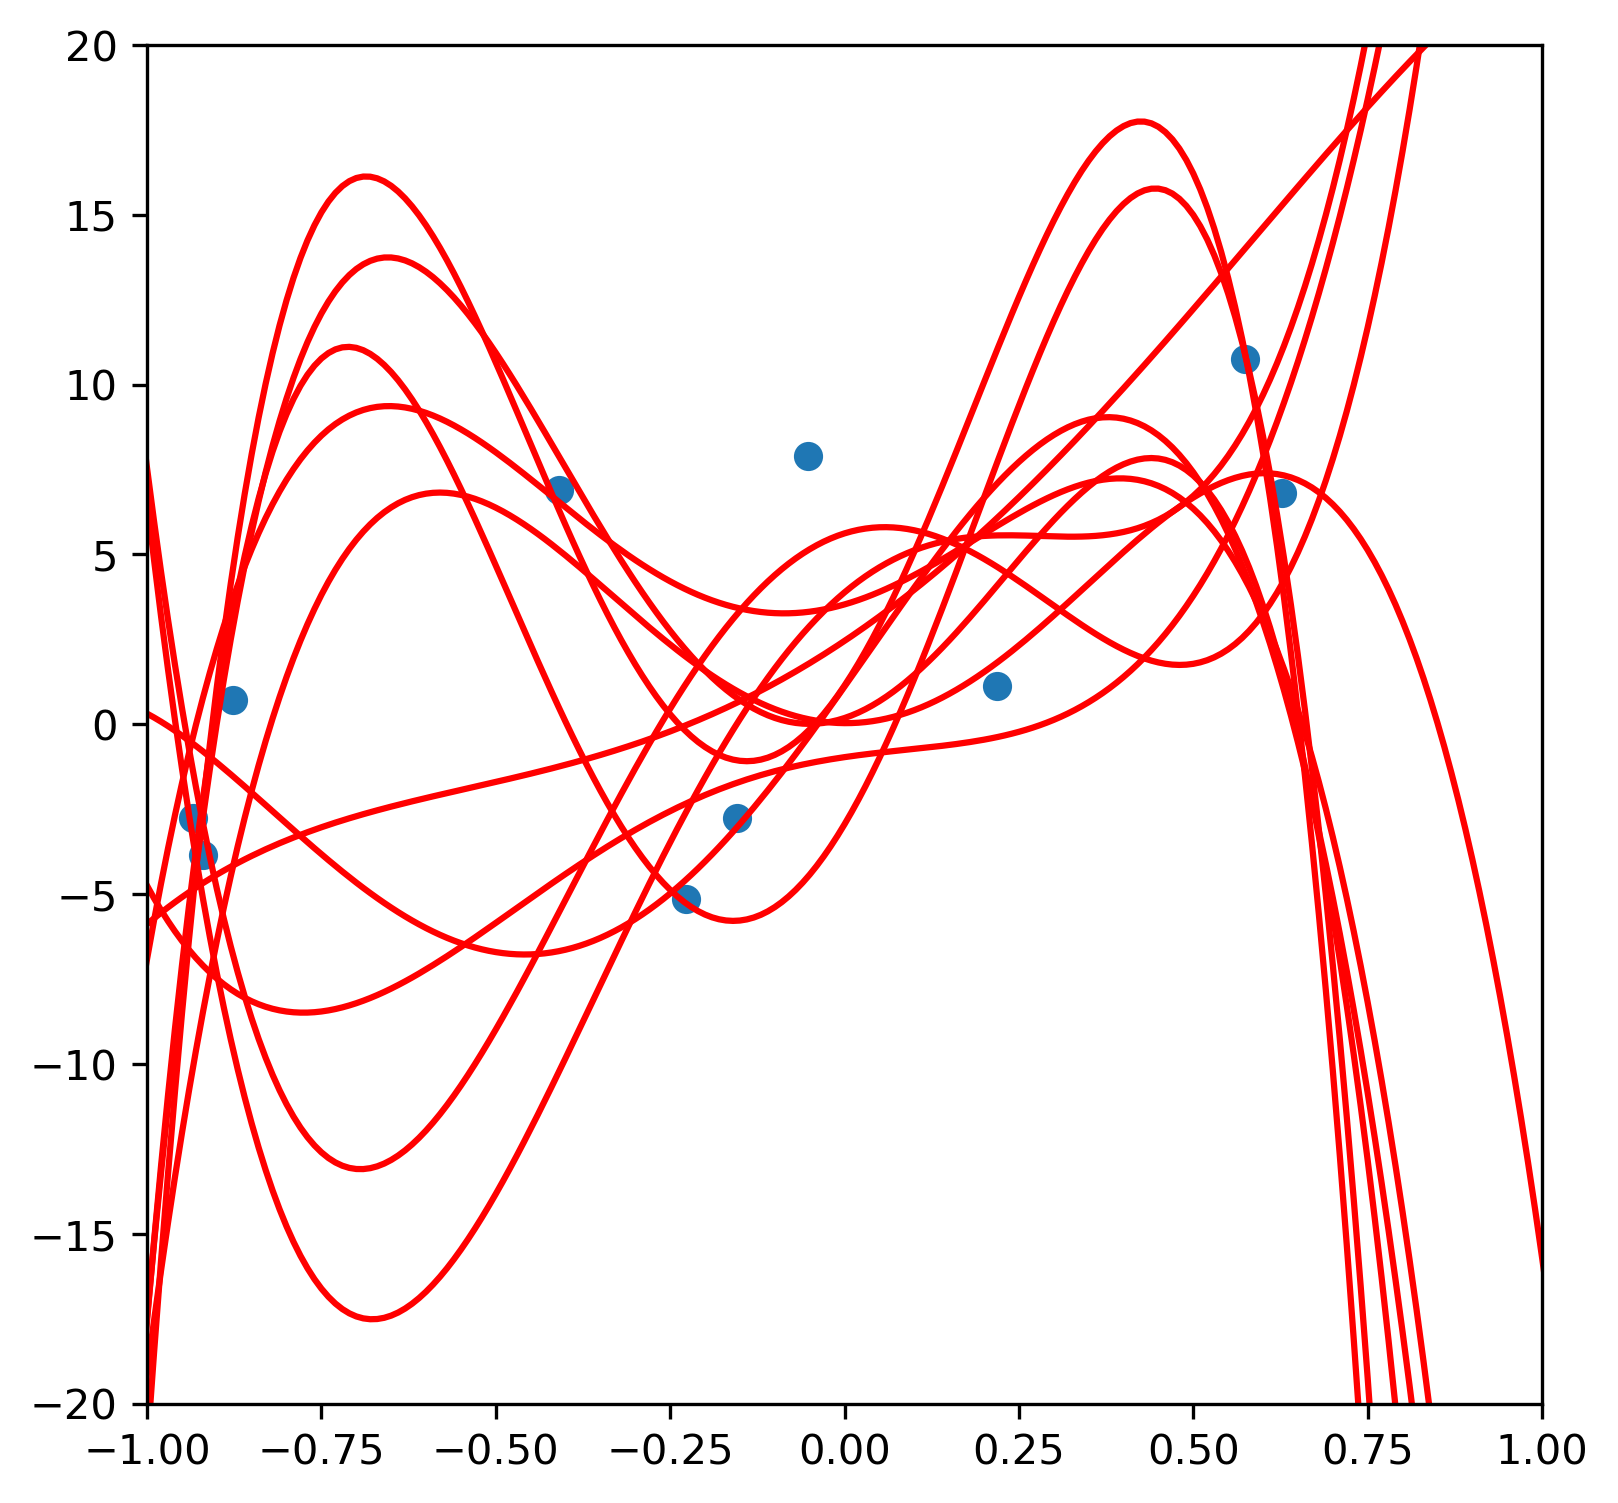

In [14]:
update(data[:10])
draw_estimates(10, data[:10])

a: 26.0
b: 575.3175620078091
lambda: 0.046483367990974814
mu: [[ 1.02555071]
 [-0.33752931]
 [-3.6755758 ]
 [ 6.03940219]
 [ 6.74223319]]
Lambda: [[50.0000001  -4.24658932 17.45415128 -4.28413871 10.96880539]
 [-4.24658932 17.45415138 -4.28413871 10.96880539 -3.48007358]
 [17.45415128 -4.28413871 10.96880549 -3.48007358  8.11147881]
 [-4.28413871 10.96880539 -3.48007358  8.11147891 -2.79056598]
 [10.96880539 -3.48007358  8.11147881 -2.79056598  6.39511318]]
lambdaLambda: [[ 2.3241684  -0.19739577  0.81132774 -0.1991412   0.50986702]
 [-0.19739577  0.81132774 -0.1991412   0.50986702 -0.16176554]
 [ 0.81132774 -0.1991412   0.50986702 -0.16176554  0.37704885]
 [-0.1991412   0.50986702 -0.16176554  0.37704886 -0.12971491]
 [ 0.50986702 -0.16176554  0.37704885 -0.12971491  0.2972664 ]]
lambda: 0.0468849995586838
mu: [[ 1.02555071]
 [-0.33752931]
 [-3.6755758 ]
 [ 6.03940219]
 [ 6.74223319]]
Lambda: [[50.0000001  -4.24658932 17.45415128 -4.28413871 10.96880539]
 [-4.24658932 17.45415138 -4.2

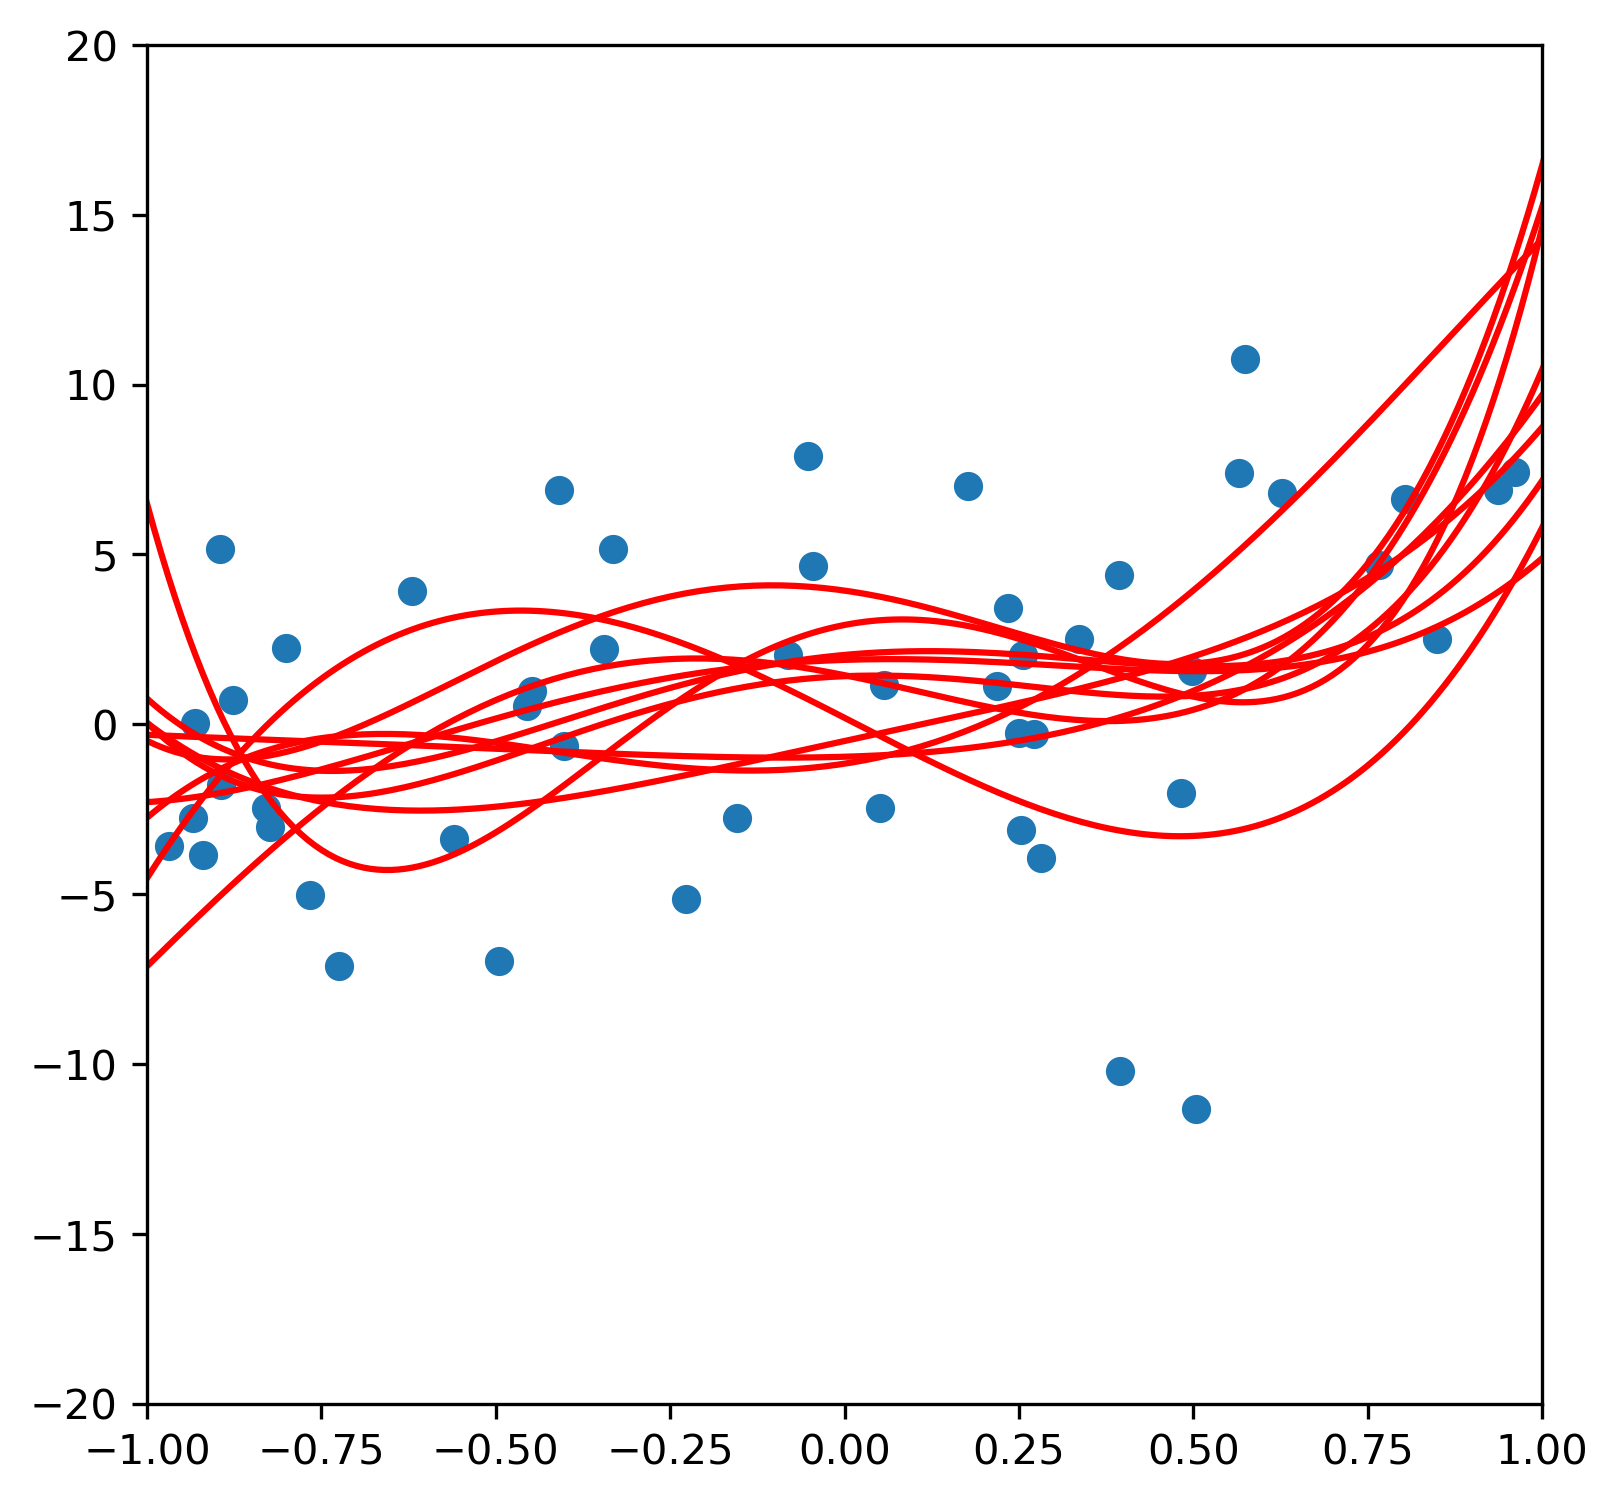

In [15]:
update(data[:50])
draw_estimates(10, data[:50])

a: 51.0
b: 1110.5504161103895
lambda: 0.0509930797238453
mu: [[ 1.00173389]
 [-1.25900569]
 [-3.0668433 ]
 [ 6.42150679]
 [ 6.45986291]]
Lambda: [[100.0000001   -3.31613692  36.0572659   -2.47899879  21.79518215]
 [ -3.31613692  36.057266    -2.47899879  21.79518215  -1.86992519]
 [ 36.0572659   -2.47899879  21.79518225  -1.86992519  15.50975041]
 [ -2.47899879  21.79518215  -1.86992519  15.50975051  -1.36215244]
 [ 21.79518215  -1.86992519  15.50975041  -1.36215244  11.90570935]]
lambdaLambda: [[ 5.09930798 -0.16910003  1.83867103 -0.12641178  1.11140346]
 [-0.16910003  1.83867104 -0.12641178  1.11140346 -0.09535324]
 [ 1.83867103 -0.12641178  1.11140347 -0.09535324  0.79088994]
 [-0.12641178  1.11140346 -0.09535324  0.79088994 -0.06946035]
 [ 1.11140346 -0.09535324  0.79088994 -0.06946035  0.60710879]]
lambda: 0.047454484988002824
mu: [[ 1.00173389]
 [-1.25900569]
 [-3.0668433 ]
 [ 6.42150679]
 [ 6.45986291]]
Lambda: [[100.0000001   -3.31613692  36.0572659   -2.47899879  21.79518215]

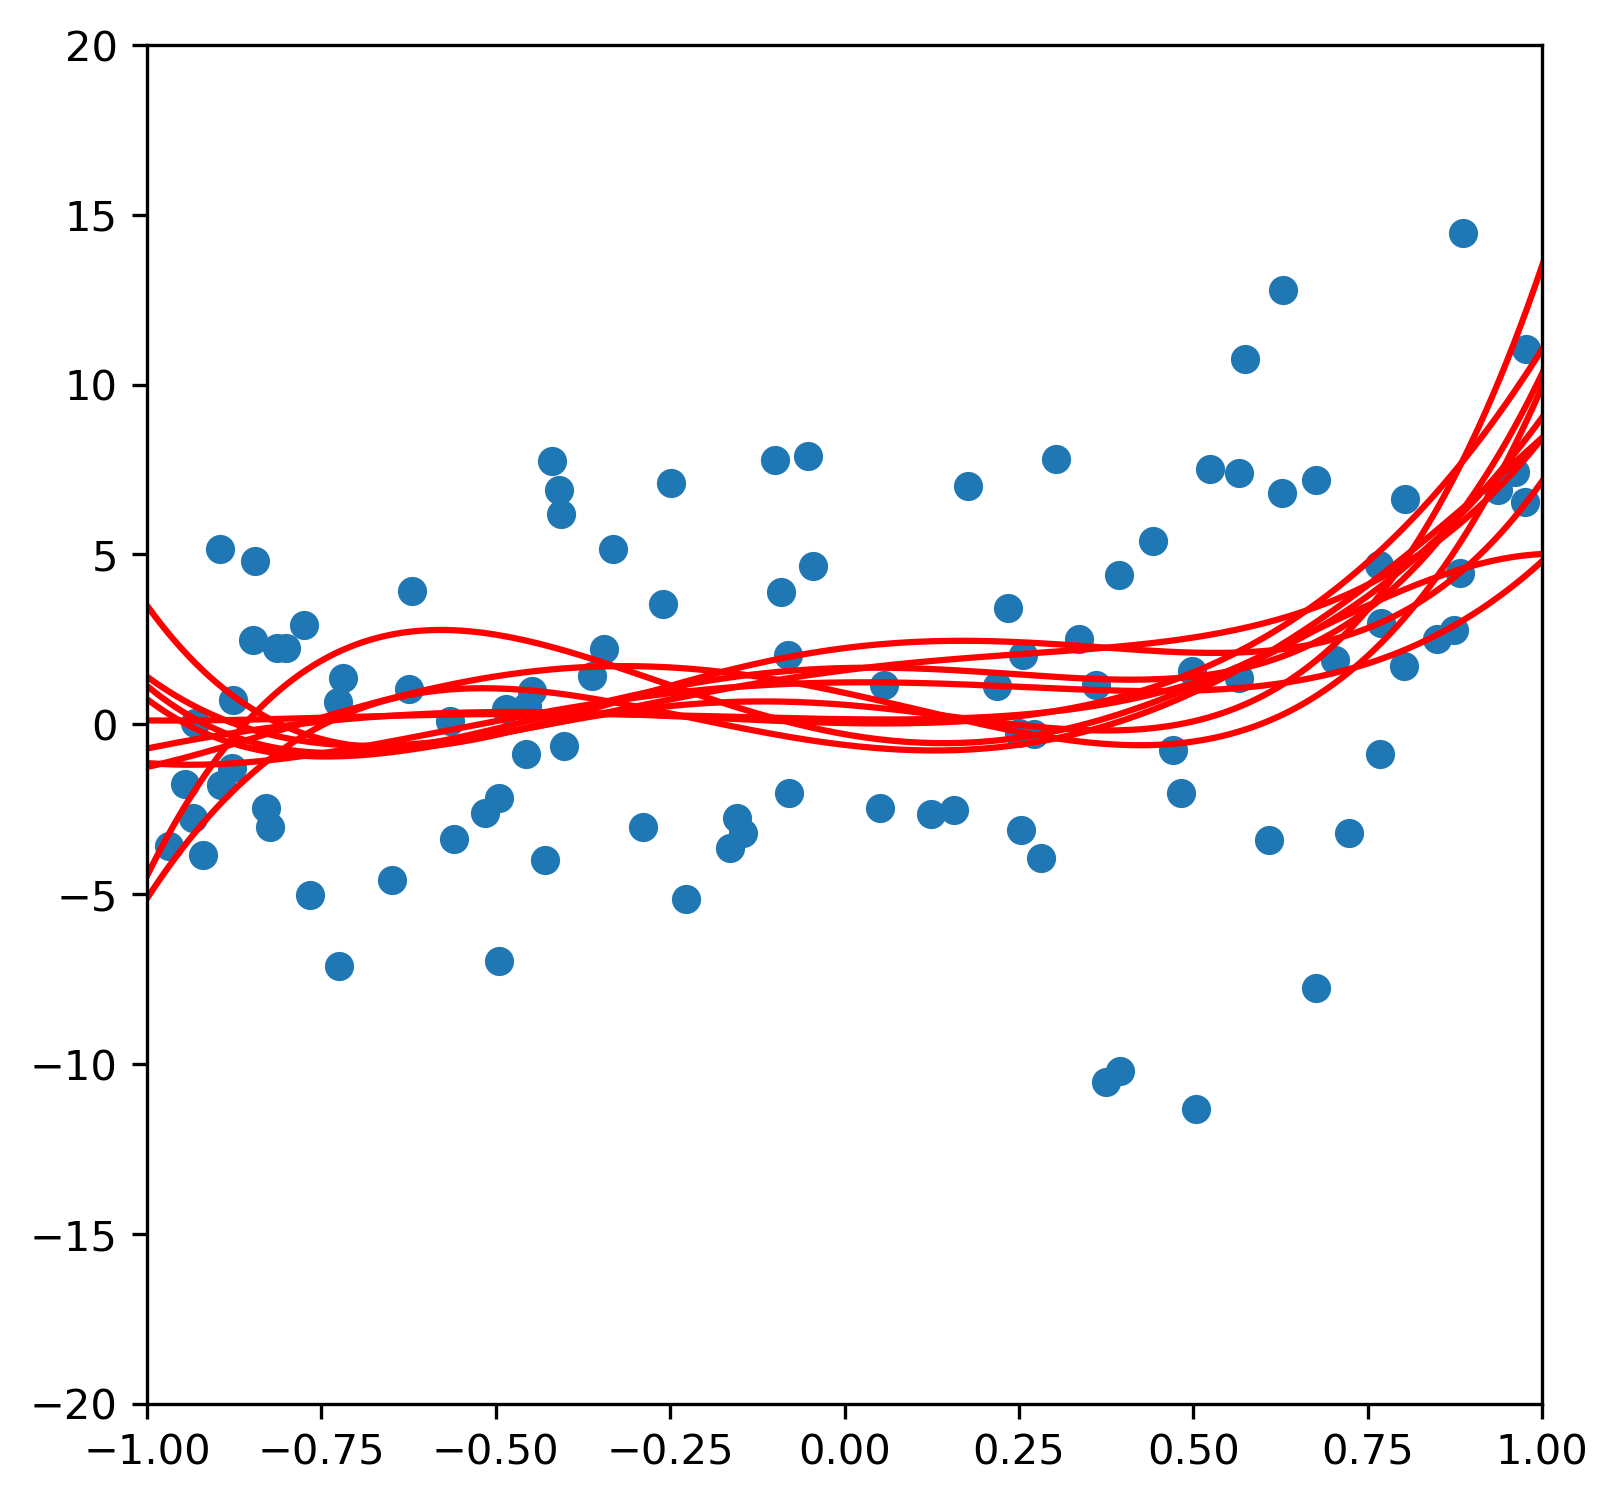

In [16]:
update(data[:100])
draw_estimates(10, data[:100])

a: 101.0
b: 1885.8589160552285
lambda: 0.04360300752023992
mu: [[ 1.19422324]
 [-0.10033531]
 [-1.83537751]
 [ 3.43754969]
 [ 5.22339087]]
Lambda: [[200.0000001    8.23898093  69.14781625   3.81858013  40.87282072]
 [  8.23898093  69.14781635   3.81858013  40.87282072   2.06236503]
 [ 69.14781625   3.81858013  40.87282082   2.06236503  28.65228826]
 [  3.81858013  40.87282072   2.06236503  28.65228836   1.21815407]
 [ 40.87282072   2.06236503  28.65228826   1.21815407  21.81011564]]
lambdaLambda: [[8.72060151 0.35924435 3.01505275 0.16650158 1.78217791]
 [0.35924435 3.01505276 0.16650158 1.78217791 0.08992532]
 [3.01505275 0.16650158 1.78217791 0.08992532 1.24932594]
 [0.16650158 1.78217791 0.08992532 1.24932594 0.05311518]
 [1.78217791 0.08992532 1.24932594 0.05311518 0.95098664]]
lambda: 0.05366872384246595
mu: [[ 1.19422324]
 [-0.10033531]
 [-1.83537751]
 [ 3.43754969]
 [ 5.22339087]]
Lambda: [[200.0000001    8.23898093  69.14781625   3.81858013  40.87282072]
 [  8.23898093  69.1478

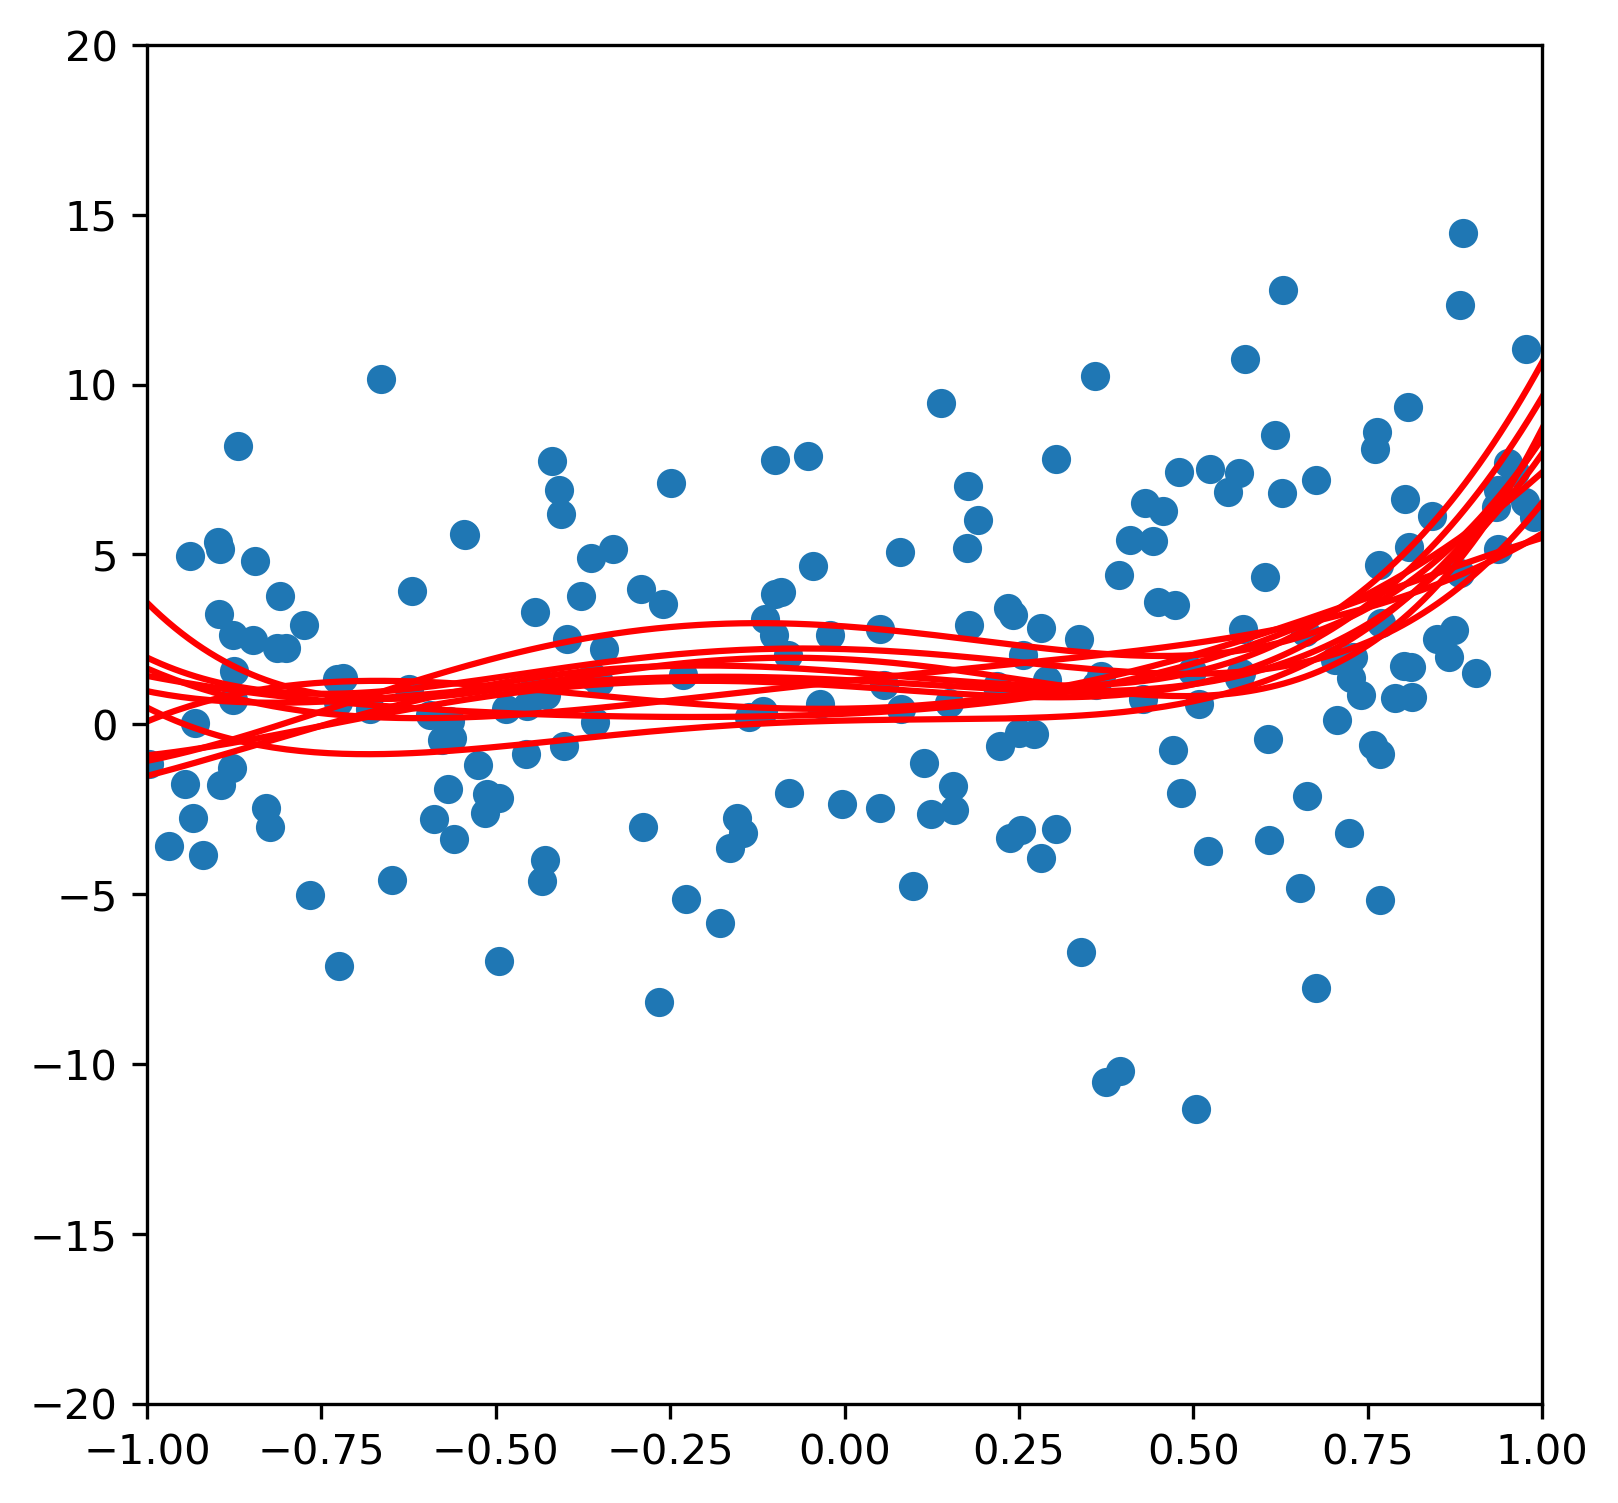

In [17]:
update(data[:200])
draw_estimates(10, data[:200])

a: 251.0
b: 6002.271701825249
lambda: 0.04416804287695341
mu: [[ 1.37615038]
 [ 1.17959485]
 [-2.81253108]
 [ 0.65364537]
 [ 6.17680657]]
Lambda: [[5.00000000e+02 1.04085797e+01 1.77697276e+02 2.10486347e+00
  1.09094538e+02]
 [1.04085797e+01 1.77697277e+02 2.10486347e+00 1.09094538e+02
  6.28749622e-01]
 [1.77697276e+02 2.10486347e+00 1.09094539e+02 6.28749622e-01
  7.85736363e+01]
 [2.10486347e+00 1.09094538e+02 6.28749622e-01 7.85736364e+01
  2.62348541e-01]
 [1.09094538e+02 6.28749622e-01 7.85736363e+01 2.62348541e-01
  6.10054965e+01]]
lambdaLambda: [[2.20840214e+01 4.59726595e-01 7.84854093e+00 9.29676999e-02
  4.81849225e+00]
 [4.59726595e-01 7.84854093e+00 9.29676999e-02 4.81849225e+00
  2.77706403e-02]
 [7.84854093e+00 9.29676999e-02 4.81849225e+00 2.77706403e-02
  3.47044374e+00]
 [9.29676999e-02 4.81849225e+00 2.77706403e-02 3.47044374e+00
  1.15874216e-02]
 [4.81849225e+00 2.77706403e-02 3.47044374e+00 1.15874216e-02
  2.69449339e+00]]
lambda: 0.04148507318862525
mu: [[ 1.3

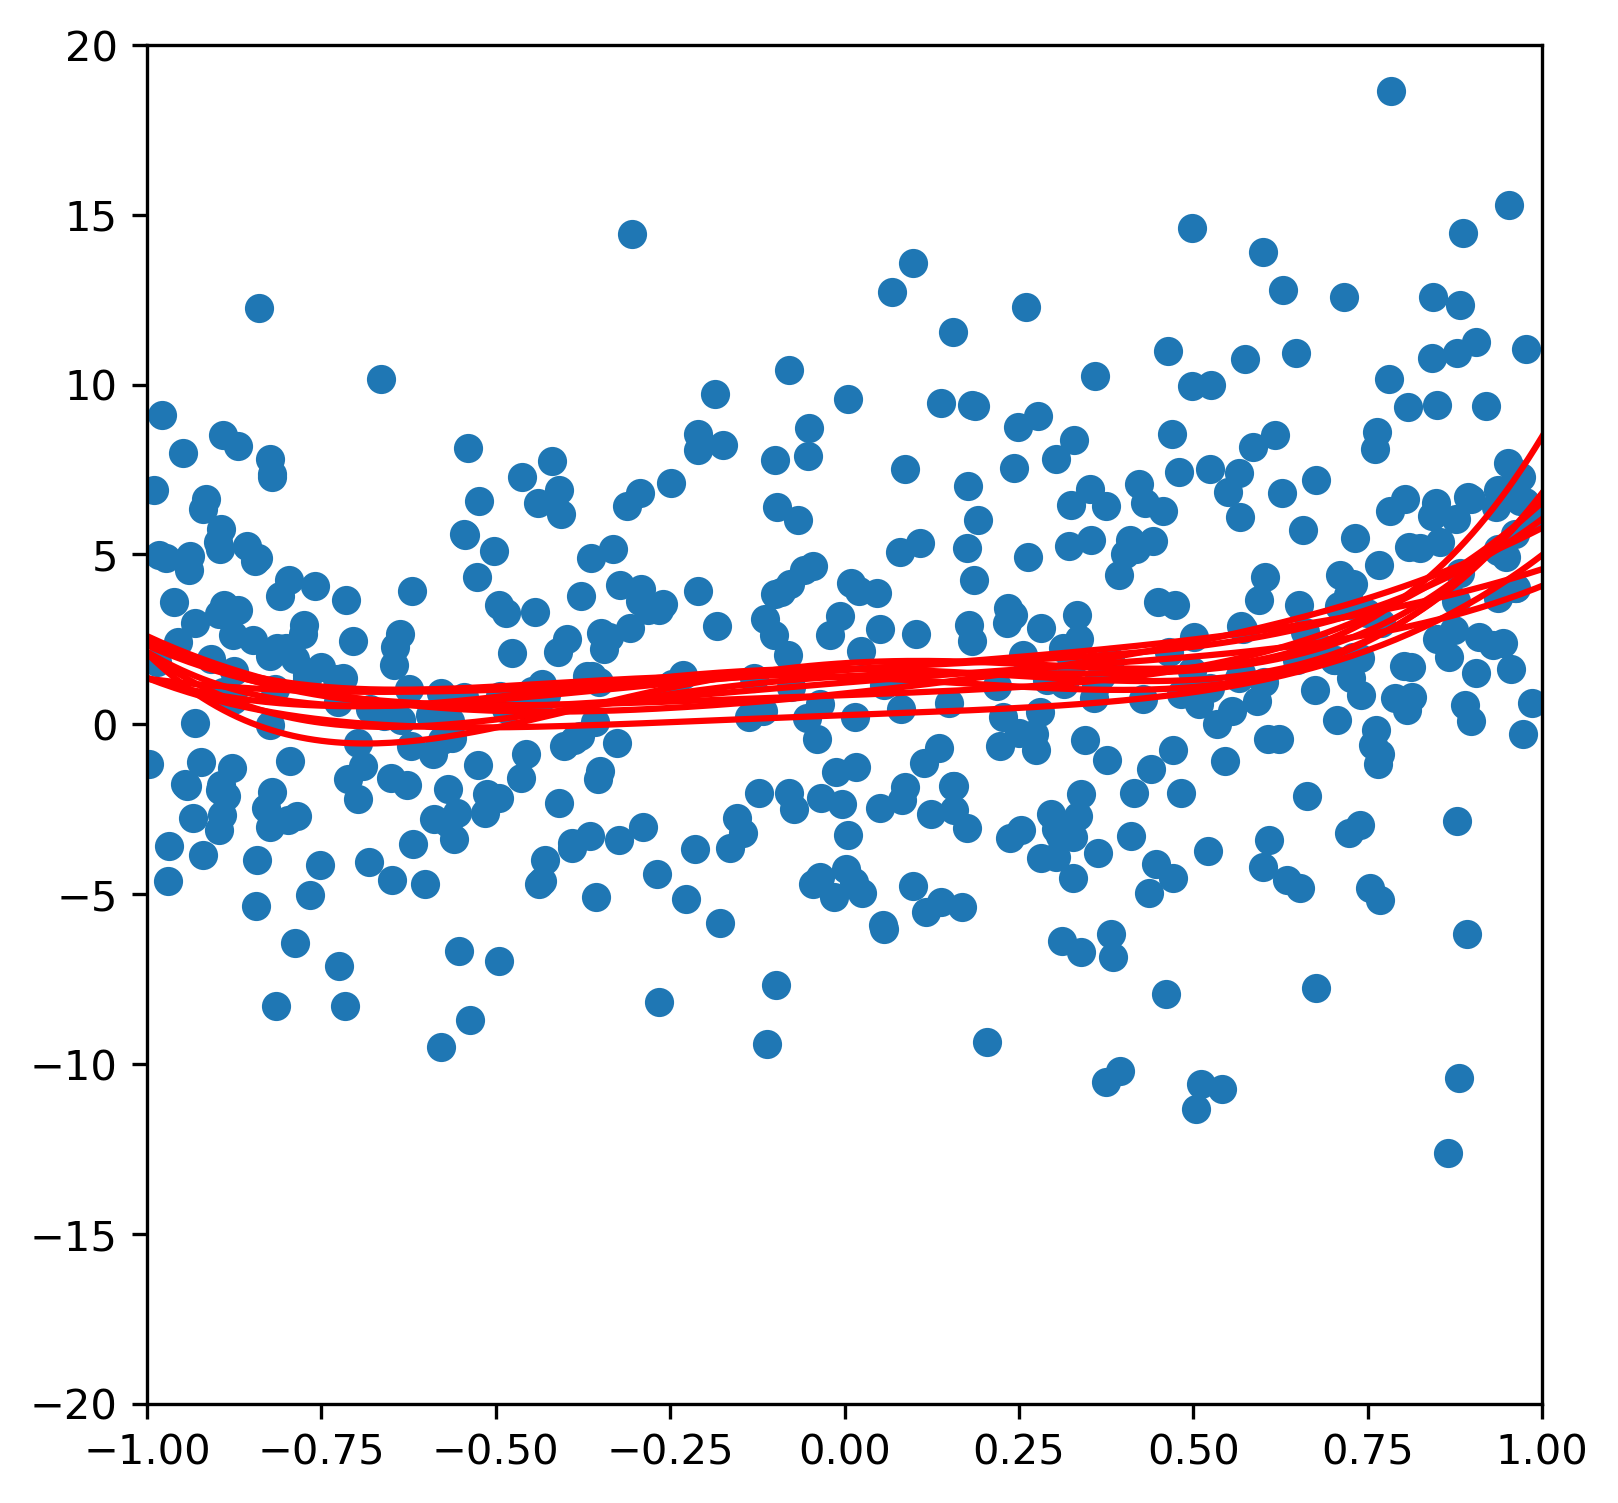

In [18]:
update(data[:500])
draw_estimates(10, data[:500])

a: 501.0
b: 12429.189379167305
lambda: 0.041985154817239675
mu: [[ 1.09530575]
 [ 0.81031598]
 [-0.54308939]
 [ 1.40782142]
 [ 2.63249166]]
Lambda: [[1000.0000001     1.7414098   350.34712454   -1.87506934  213.43600763]
 [   1.7414098   350.34712464   -1.87506934  213.43600763   -1.69443693]
 [ 350.34712454   -1.87506934  213.43600773   -1.69443693  153.012649  ]
 [  -1.87506934  213.43600763   -1.69443693  153.0126491    -1.26505424]
 [ 213.43600763   -1.69443693  153.012649     -1.26505424  118.70131358]]
lambdaLambda: [[41.98515482  0.07311336 14.70937826 -0.07872508  8.96114382]
 [ 0.07311336 14.70937827 -0.07872508  8.96114382 -0.0711412 ]
 [14.70937826 -0.07872508  8.96114383 -0.0711412   6.42425976]
 [-0.07872508  8.96114382 -0.0711412   6.42425976 -0.0531135 ]
 [ 8.96114382 -0.0711412   6.42425976 -0.0531135   4.98369303]]
lambda: 0.04212930936224113
mu: [[ 1.09530575]
 [ 0.81031598]
 [-0.54308939]
 [ 1.40782142]
 [ 2.63249166]]
Lambda: [[1000.0000001     1.7414098   350.34712

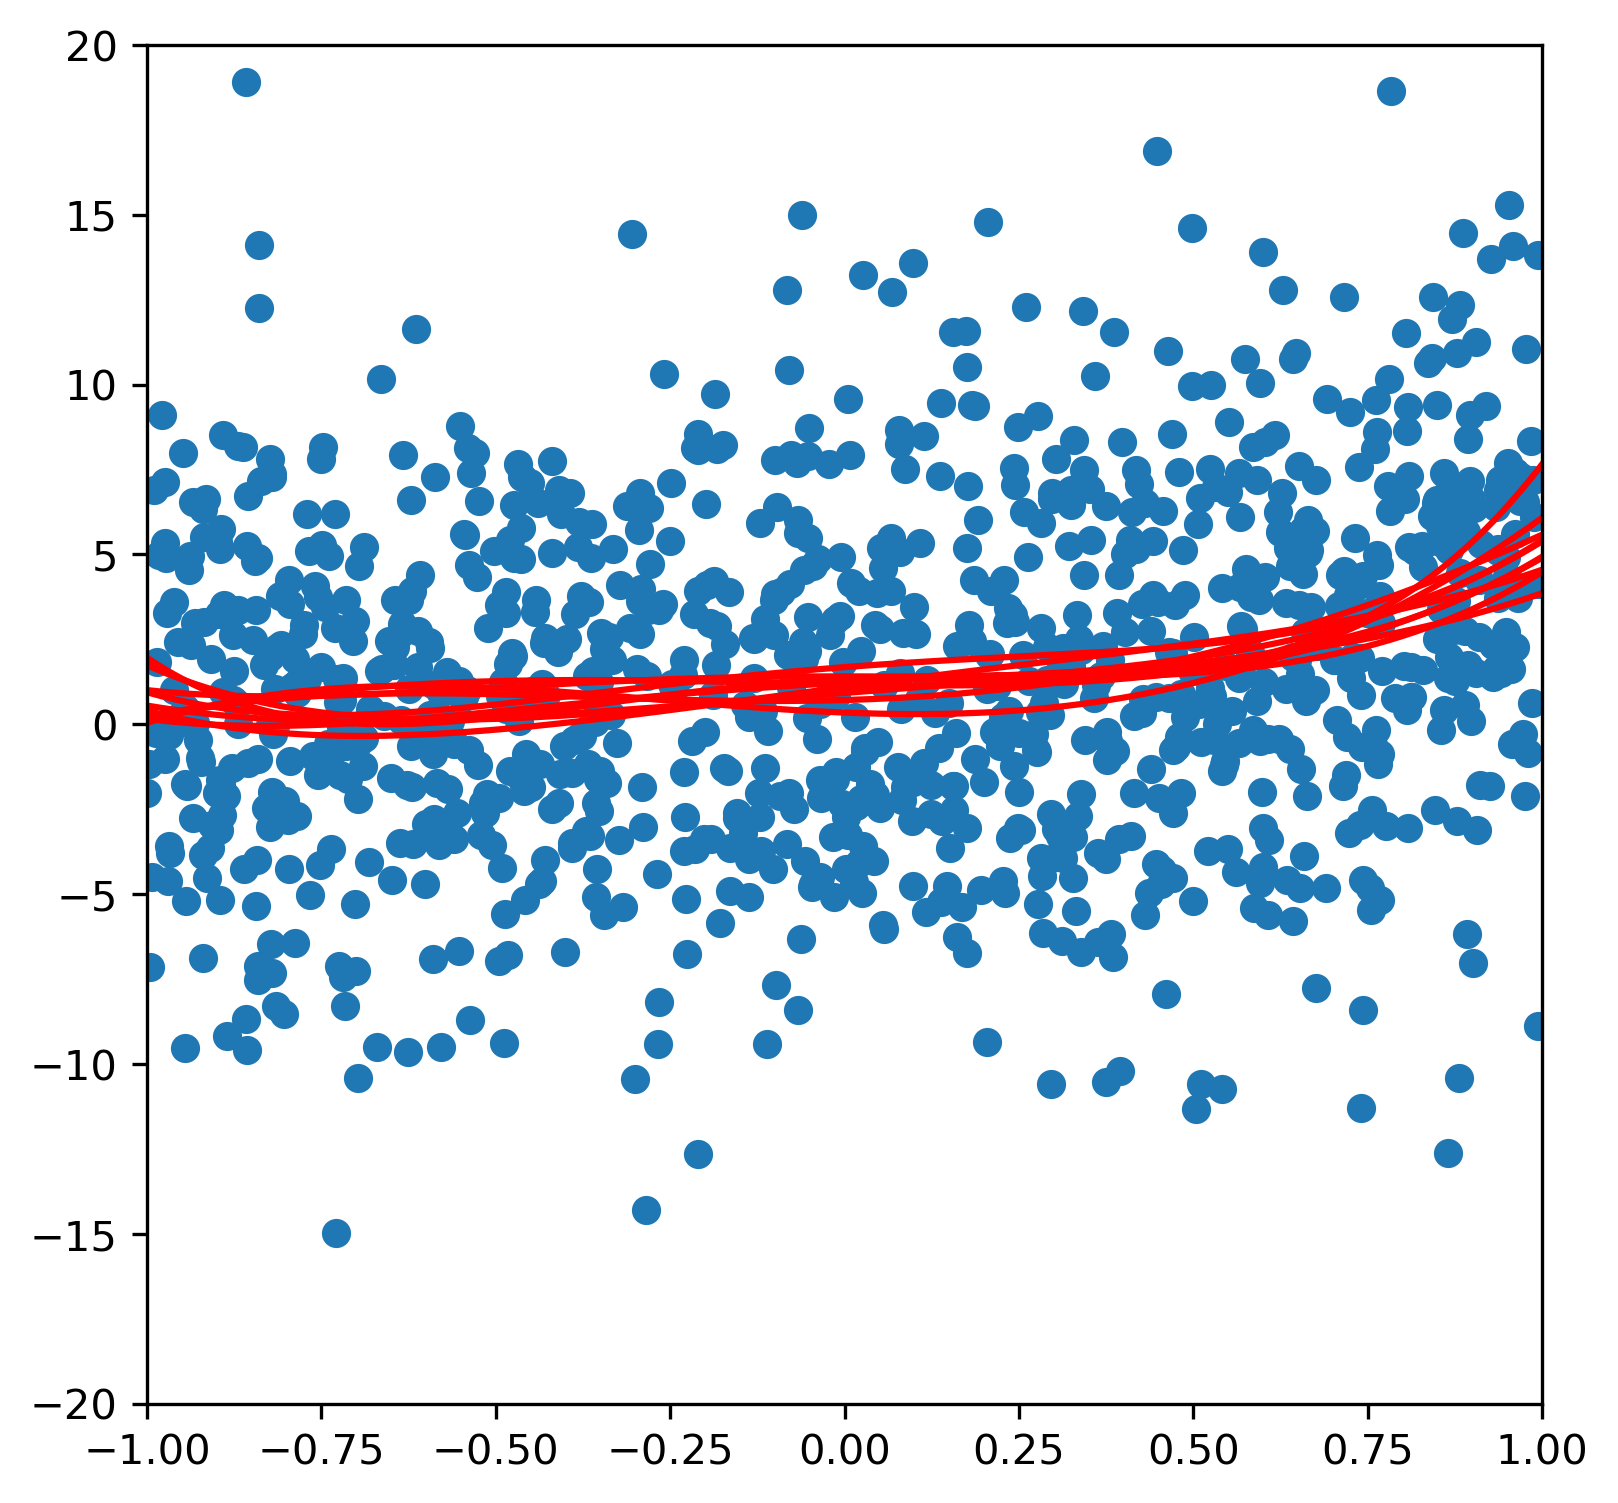

In [19]:
update(data)
draw_estimates(10, data)

In [20]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ 11.27490677],
        [ 60.73776643],
        [-74.99304027],
        [-92.8269109 ],
        [ 63.74898599]]),
 array([[  0.10754207],
        [  8.63871834],
        [ 48.35229779],
        [-21.3811426 ],
        [-73.09420086]]),
 array([[ 1.02555071],
        [-0.33752931],
        [-3.6755758 ],
        [ 6.03940219],
        [ 6.74223319]]),
 array([[ 1.00173389],
        [-1.25900569],
        [-3.0668433 ],
        [ 6.42150679],
        [ 6.45986291]]),
 array([[ 1.19422324],
        [-0.10033531],
        [-1.83537751],
        [ 3.43754969],
        [ 5.22339087]]),
 array([[ 1.37615038],
        [ 1.17959485],
        [-2.81253108],
        [ 0.65364537],
        [ 6.17680657]]),
 array([[ 1.09530575],
        [ 0.81031598],
        [-0.54308939],
        [ 1.40782142],
        [ 2.63249166]])]

In [21]:
a

[1, 3.5, 6.0, 26.0, 51.0, 101.0, 251.0, 501.0]

In [22]:
b

[100,
 100.00110610162139,
 164.87266288186171,
 575.3175620078091,
 1110.5504161103895,
 1885.8589160552285,
 6002.271701825249,
 12429.189379167305]

In [23]:
1/np.sqrt(lmd)

array([11.01306423])

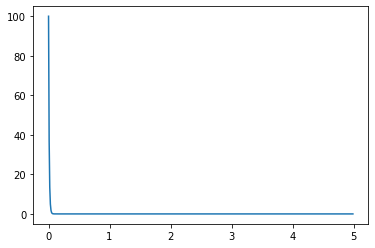

In [24]:
draw(lambda_dist, 0, 5, 0.01)

In [25]:
data = []
for i in range(1000):
    x = (np.random.rand() - 0.5)*2
    y = x**2 + 2*x + 1.0 + np.random.randn()*5
    
    data.append([x,y])
    
data

[[0.6216471093324663, -5.473618060099377],
 [-0.4349093491006564, -3.8880316715338976],
 [-0.9849294087648772, -4.128538640375335],
 [-0.3900486627934965, -2.6099361779077244],
 [0.6754697292701031, 2.9747411207345436],
 [0.8465016362148734, 9.983340349824733],
 [0.7779776339442286, 1.7822777919718984],
 [-0.18964135402696636, 3.5913476071733],
 [0.80040604404696, 5.956536120923379],
 [0.8668877058316002, 1.9834312290042875],
 [0.47153074399042216, 7.726990979656272],
 [-0.1984329148681674, -2.198212263285116],
 [0.4415114925065342, -2.827673871594333],
 [0.9662280240558605, 6.7383955768219685],
 [-0.48507654430353364, 0.09909247531896301],
 [0.041841717226224207, 0.9707397750753768],
 [0.6190746849302438, 6.463373149649835],
 [-0.40359142236654044, 3.849791666924506],
 [-0.8664889302554342, 2.6758176264302027],
 [0.797175135939562, -1.346445697634291],
 [0.31082022740092374, -0.5040613460019057],
 [0.6258106252449216, 4.088717875479448],
 [0.5533597702823483, 4.727195674961459],
 [-0.

In [26]:
gauss_lambda

[array([[1.e-07, 0.e+00, 0.e+00, 0.e+00, 0.e+00],
        [0.e+00, 1.e-07, 0.e+00, 0.e+00, 0.e+00],
        [0.e+00, 0.e+00, 1.e-07, 0.e+00, 0.e+00],
        [0.e+00, 0.e+00, 0.e+00, 1.e-07, 0.e+00],
        [0.e+00, 0.e+00, 0.e+00, 0.e+00, 1.e-07]]),
 array([[ 5.0000001 ,  0.04493447,  1.54772292, -0.25047538,  0.85893251],
        [ 0.04493447,  1.54772302, -0.25047538,  0.85893251, -0.36049574],
        [ 1.54772292, -0.25047538,  0.85893261, -0.36049574,  0.55300476],
        [-0.25047538,  0.85893251, -0.36049574,  0.55300486, -0.34109767],
        [ 0.85893251, -0.36049574,  0.55300476, -0.34109767,  0.38678246]]),
 array([[10.0000001 , -2.1531697 ,  3.50518286, -1.90532732,  2.36678046],
        [-2.1531697 ,  3.50518296, -1.90532732,  2.36678046, -1.74087776],
        [ 3.50518286, -1.90532732,  2.36678056, -1.74087776,  1.82742098],
        [-1.90532732,  2.36678046, -1.74087776,  1.82742108, -1.52020025],
        [ 2.36678046, -1.74087776,  1.82742098, -1.52020025,  1.4791659

In [27]:
mu

[array([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]),
 array([[ 11.27490677],
        [ 60.73776643],
        [-74.99304027],
        [-92.8269109 ],
        [ 63.74898599]]),
 array([[  0.10754207],
        [  8.63871834],
        [ 48.35229779],
        [-21.3811426 ],
        [-73.09420086]]),
 array([[ 1.02555071],
        [-0.33752931],
        [-3.6755758 ],
        [ 6.03940219],
        [ 6.74223319]]),
 array([[ 1.00173389],
        [-1.25900569],
        [-3.0668433 ],
        [ 6.42150679],
        [ 6.45986291]]),
 array([[ 1.19422324],
        [-0.10033531],
        [-1.83537751],
        [ 3.43754969],
        [ 5.22339087]]),
 array([[ 1.37615038],
        [ 1.17959485],
        [-2.81253108],
        [ 0.65364537],
        [ 6.17680657]]),
 array([[ 1.09530575],
        [ 0.81031598],
        [-0.54308939],
        [ 1.40782142],
        [ 2.63249166]])]